# **Implementación de una técnica de aprendizaje máquina sin el uso de un framework**

In [108]:
import pandas as pd
import numpy as np

In [109]:
# Cargar dataset
data = pd.read_csv("Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [110]:
data['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [111]:
# Transformar variables categóricas a numéricas con mapeo
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 0, 'F': 1})
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0.0,9,1,91.0
1,4,82,NaN,4,2,65.0
2,8,51,0.0,7,2,45.0
3,5,52,0.0,5,2,36.0
4,7,75,NaN,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,0.0,4,2,23.0
9996,7,64,0.0,8,5,58.0
9997,6,83,0.0,8,5,74.0
9998,9,97,0.0,7,0,95.0


In [112]:
# Valores unicos de la columna objetivo
unique_values = np.unique(data['Performance Index'])
unique_values


array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100.])

In [113]:
# Transformar variable objetivo en categórica failed y passed
data['Performance Index'] = ['Passed' if x > 70 else 'Failed' for x in data['Performance Index']]
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0.0,9,1,Passed
1,4,82,NaN,4,2,Failed
2,8,51,0.0,7,2,Failed
3,5,52,0.0,5,2,Failed
4,7,75,NaN,8,5,Failed
...,...,...,...,...,...,...
9995,1,49,0.0,4,2,Failed
9996,7,64,0.0,8,5,Failed
9997,6,83,0.0,8,5,Passed
9998,9,97,0.0,7,0,Passed


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        4948 non-null   float64
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [115]:
# Fill NaNs con la media de la columna
data.fillna(data['Extracurricular Activities'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  float64
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## **Data split**

In [116]:
# Split data into features and target
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

# Split data into training and testing sets sin usar sklearn
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [117]:
# Show train data
print("X_train tiene: ",len(X_train), " datos")
print(X_train)

X_train tiene:  8000  datos
      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0                 7               99                         0.0            9   
1                 4               82                         0.0            4   
2                 8               51                         0.0            7   
3                 5               52                         0.0            5   
4                 7               75                         0.0            8   
...             ...              ...                         ...          ...   
7995              9               77                         0.0            7   
7996              7               53                         0.0            4   
7997              5               86                         0.0            8   
7998              7               53                         0.0            6   
7999              3               82                         0.0            8   


In [118]:
print("y_train tiene: ",len(y_train), " datos")
print(y_train)

y_train tiene:  8000  datos
0       Passed
1       Failed
2       Failed
3       Failed
4       Failed
         ...  
7995    Passed
7996    Failed
7997    Failed
7998    Failed
7999    Failed
Name: Performance Index, Length: 8000, dtype: object


In [119]:
# Show test data
print("X_test tiene: ",len(X_test), " datos")
print(X_test)

X_test tiene:  2000  datos
      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
8000              2               50                         0.0            4   
8001              5               48                         0.0            8   
8002              4               77                         0.0            8   
8003              5               86                         0.0            6   
8004              8               83                         0.0            4   
...             ...              ...                         ...          ...   
9995              1               49                         0.0            4   
9996              7               64                         0.0            8   
9997              6               83                         0.0            8   
9998              9               97                         0.0            7   
9999              7               74                         0.0            8   



In [120]:
print("y_test tiene: ",len(y_test), " datos")
print(y_test)

y_test tiene:  2000  datos
8000    Failed
8001    Failed
8002    Failed
8003    Passed
8004    Passed
         ...  
9995    Failed
9996    Failed
9997    Passed
9998    Passed
9999    Failed
Name: Performance Index, Length: 2000, dtype: object


## **Gradient descent**

In [121]:
# Inicialización de pesos entre -0.5 y 0.5 
weights = [0.1,0.8,0.2,0.6,0.3]
weights

[0.1, 0.8, 0.2, 0.6, 0.3]

In [122]:
vals_xw = X_train * weights
predictions_train = np.sum(vals_xw, axis=1).round()
for i in range(len(predictions_train)):
    if predictions_train[i] < 0:
        predictions_train[i] = 0
    elif predictions_train[i] > 100:
        predictions_train[i] = 100
predictions_train

0       86.0
1       69.0
2       46.0
3       46.0
4       67.0
        ... 
7995    68.0
7996    46.0
7997    76.0
7998    48.0
7999    72.0
Length: 8000, dtype: float64

In [123]:
predictions_train.unique()

array([86., 69., 46., 67., 70., 64., 41., 68., 74., 78., 44., 61., 65.,
       72., 49., 83., 66., 73., 54., 56., 71., 81., 76., 42., 63., 48.,
       84., 53., 47., 59., 39., 75., 50., 62., 82., 43., 85., 79., 57.,
       77., 40., 60., 55., 51., 38., 52., 45., 58., 37., 80., 87., 35.,
       36., 88.])

In [124]:
# Transformar predictions_train en categórica
predictions_train = ['Passed' if x > 70 else 'Failed' for x in predictions_train]
predictions_train = pd.Series(predictions_train)
predictions_train.unique()


array(['Passed', 'Failed'], dtype=object)

<Axes: >

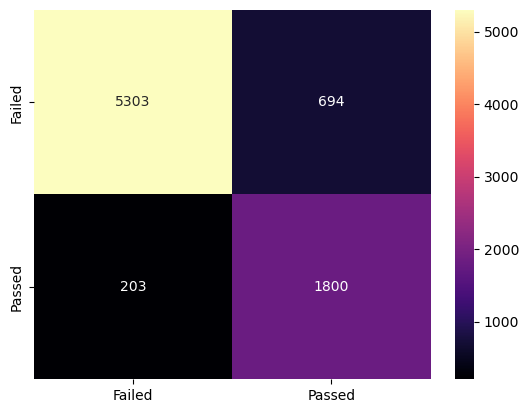

In [128]:
# Matriz de confusión y_train vs predictions_train
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train, predictions_train)
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'])    

In [129]:
# Evaluar modelo en conjunto de prueba
vals_xw_test = X_test * weights
predictions_test = np.sum(vals_xw_test, axis=1).round()
predictions_test = ['Passed' if x > 70 else 'Failed' for x in predictions_test]
predictions_test = pd.Series(predictions_test)
predictions_test.unique()


array(['Failed', 'Passed'], dtype=object)

<Axes: >

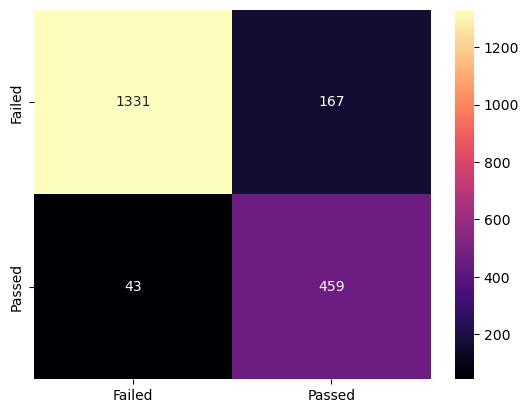

In [130]:
# Matriz de confusión y_train vs predictions_train
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed']) 

In [131]:
# Métricas de desempeño
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

      Failed       0.97      0.89      0.93      1498
      Passed       0.73      0.91      0.81       502

    accuracy                           0.90      2000
   macro avg       0.85      0.90      0.87      2000
weighted avg       0.91      0.90      0.90      2000

